In [10]:
from pkg_estimator import carto
import pandas as pd
import seaborn as sns

In [11]:
map_folium, gold_data = carto.build_carto(
    nom_commune = 'Bordeaux',
    type_local = 'Appartement',
    nature_mutation = "Vente")

dirname_parent /Users/Flo/.pyenv/versions/spd3.1.6/lib/python3.10/site-packages/pkg_estimator
dirname_file /Users/Flo/.pyenv/versions/spd3.1.6/lib/python3.10/site-packages/pkg_estimator
****************************** /Users/Flo/.pyenv/versions/spd3.1.6/lib/python3.10/site-packages/pkg_estimator/data/full.pkl


<Axes: xlabel='surface_reelle_bati', ylabel='valeur_fonciere'>

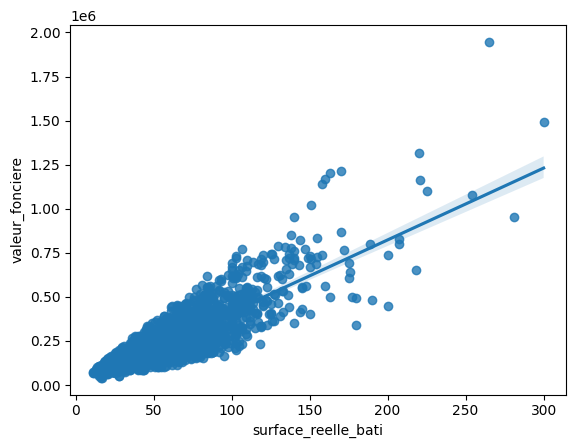

In [12]:
sns.regplot(data = gold_data, x = "surface_reelle_bati", y = "valeur_fonciere")

In [21]:
X = gold_data[["surface_reelle_bati"]]
y = gold_data["valeur_fonciere"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

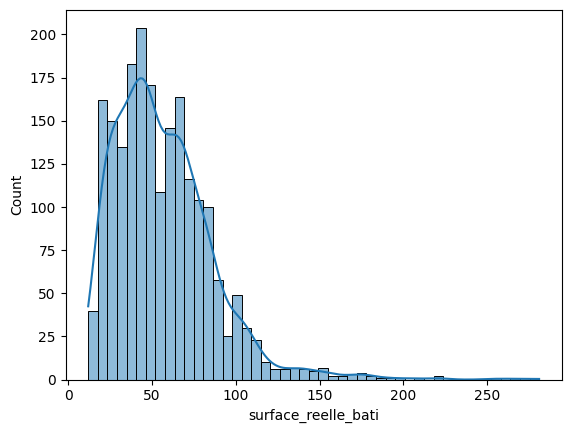

In [28]:
sns.histplot(data= X_train, x= "surface_reelle_bati", kde=True);

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
scaler.fit(X_train)

StandardScaler()

In [44]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
# model

In [46]:
from sklearn import linear_model
model_linear_lasso = linear_model.Lasso(alpha=0.1)

In [48]:
model_linear_lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [52]:
y_train_predict = model_linear_lasso.predict(X_train_scaled)

In [56]:
import numpy as np

In [58]:
erreur = y_train_predict - y_train

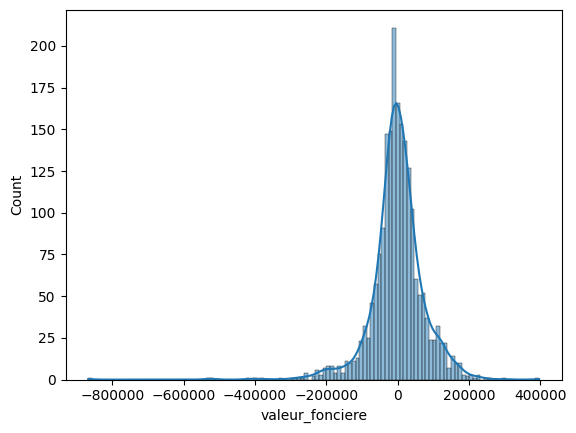

In [61]:
sns.histplot(erreur, kde=True);

In [ ]:
model_linear_lasso.fit(X_train_scaled, y_train)

In [ ]:
y_train_predict = model_linear_lasso.predict(X_train_scaled) 

In [70]:
X_test_scaled = scaler.transform(X_test)

In [71]:
y_test_predict = model_linear_lasso.predict(X_test_scaled)

In [72]:
erreur_test = y_test_predict - y_test

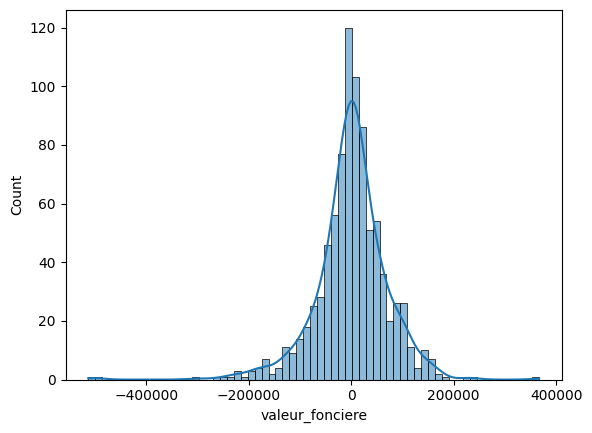

In [74]:
sns.histplot(erreur_test, kde=True);

In [75]:
# Mise en production

In [76]:
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [82]:
scaler.fit(X)
X_scaled = scaler.transform(X)

In [77]:
model_linear_lasso = linear_model.Lasso(alpha=0.1)

In [85]:
model_linear_lasso.fit(X_scaled, y)

Lasso(alpha=0.1)

In [86]:
X_user = pd.DataFrame({"surface_reelle_bati": [50]})

In [88]:
X_user_scaled = scaler.transform(X_user)

In [90]:
X_user_scaled

array([[-0.21453464]])

In [89]:
model_linear_lasso.predict(X_user_scaled)

array([210650.36615072])

In [93]:
# pipeline

In [92]:
from sklearn.compose import ColumnTransformer

In [94]:
X

,surface_reelle_bati
3,53.0
21,25.0
44,137.0
45,58.0
56,68.0
...,...
81663,82.0
81856,101.0
82088,47.0
82190,59.0


In [95]:
from sklearn.impute import SimpleImputer

In [97]:
num_transformer = StandardScaler()
preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ['surface_reelle_bati'])
])

In [99]:
from sklearn.pipeline import make_pipeline

In [101]:
pipeline = make_pipeline(
    preprocessor,
    linear_model.Lasso(alpha=0.1))

In [102]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  StandardScaler(),
                                                  ['surface_reelle_bati'])])),
                ('lasso', Lasso(alpha=0.1))])

In [107]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  StandardScaler(),
                                                  ['surface_reelle_bati'])])),
                ('lasso', Lasso(alpha=0.1))])

In [110]:
X_user

,surface_reelle_bati
0,50


In [109]:
pipeline.predict(X_user)

array([210905.80578415])